In [94]:
pip install py-AutoClean

In [95]:
import pandas as pd
from AutoClean import AutoClean
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
data = pd.read_csv('/content/WalmartDataset.csv', encoding='latin-1')

In [97]:
# Step 1: Initial exploration
print("Initial Dataset Overview:\n")
print("Null values in each column:\n", data.isnull().sum())
print("\nTotal Duplicates:", data.duplicated().sum())

data.head()


Initial Dataset Overview:

Null values in each column:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         49
Profit            0
dtype: int64

Total Duplicates: 0


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [98]:
# print no od rows
print("Number of rows in the dataset:", len(data))

Number of rows in the dataset: 9994


In [99]:
# print the outliers
data.describe()



,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9945.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156972,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206668,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [100]:
# identify column types
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [101]:
def visualize_box_plot(df):
  numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

  # Creating box plots for each numerical column
  for column in numerical_columns:
      plt.figure(figsize=(8, 6))  # Set figure size
      sns.boxplot(x=df[column])  # Create box plot
      plt.xlabel(column)  # Set x-axis label
      plt.title(f'Box Plot of {column}')  # Set plot title
      plt.show()  # Show plot

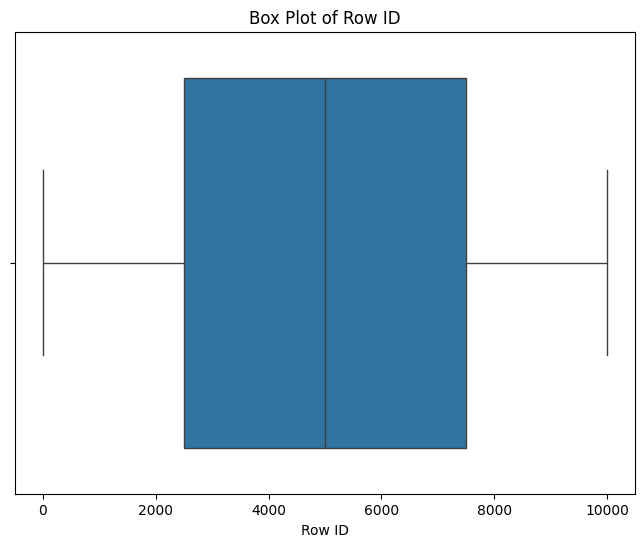

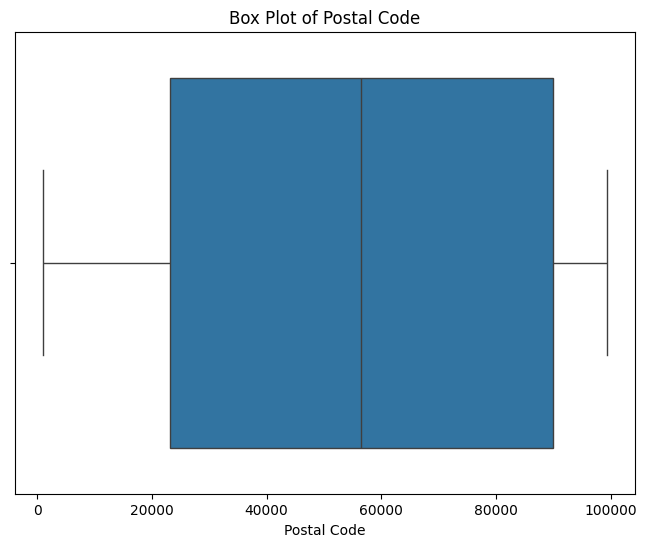

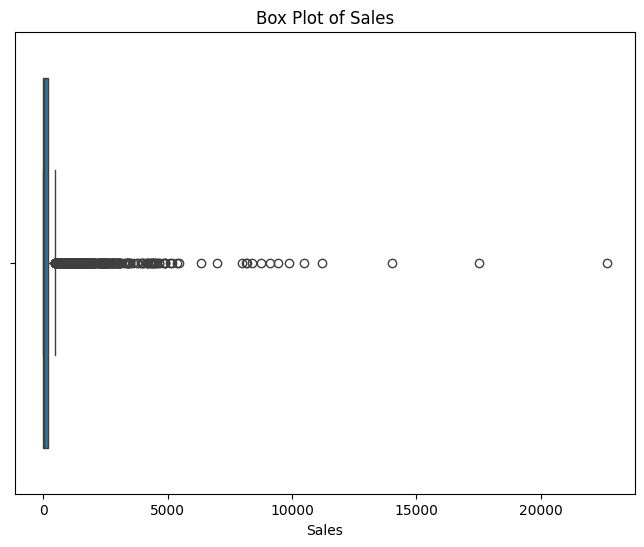

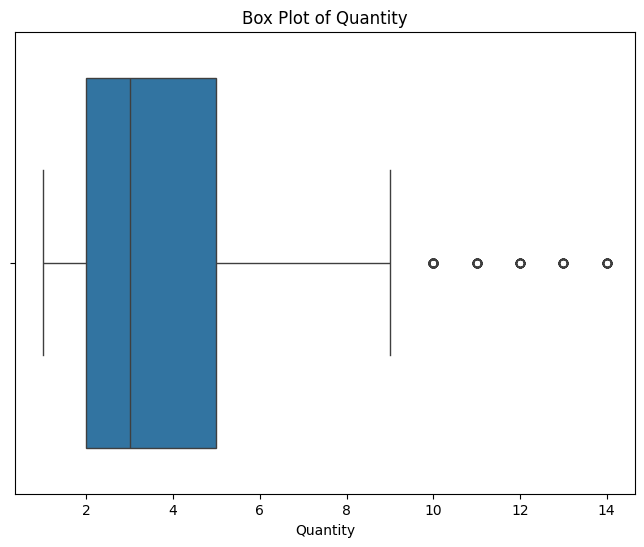

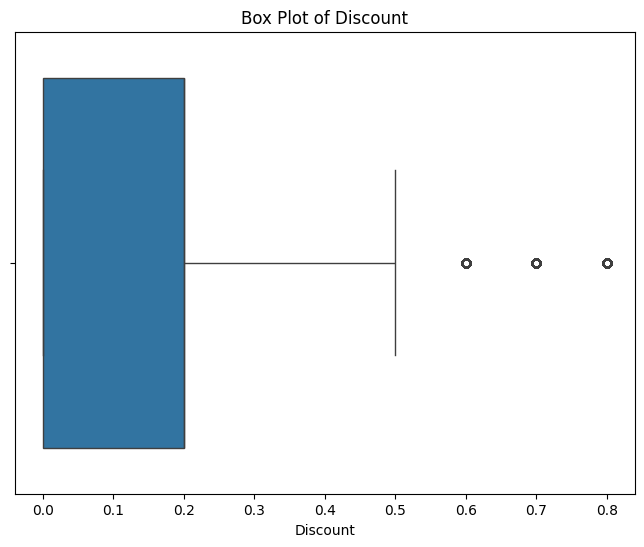

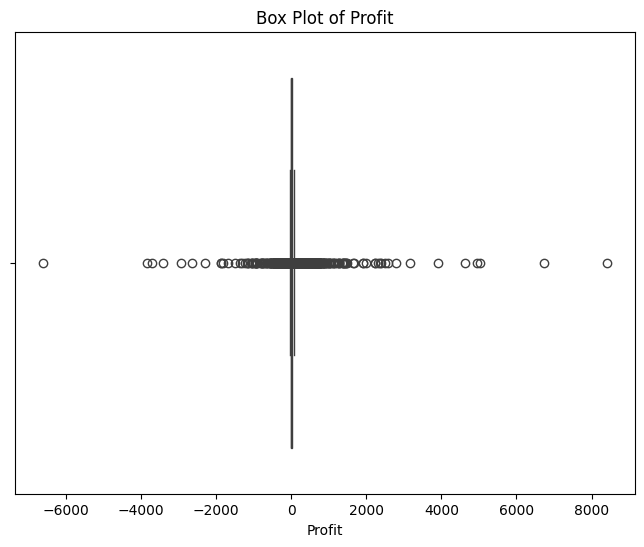

In [102]:
# Visualize before handling outliers
visualize_box_plot(data)

In [103]:
# Step 2: Apply AutoClean
cleaned_data = AutoClean(
    data,
    mode="auto",  # Cleans missing, outliers, and encodes categorical data
    encode_categ='auto',  # Encode categorical features
    missing_num=True,  # Impute missing numerical data
    missing_categ='auto',  # Impute missing categorical data
    outliers='delete',  # Detect and handle outliers
    duplicates = True,
    extract_datetime = 's',


)

AutoClean process completed in 10.752865 seconds
Logfile saved to: /content/autoclean.log


In [104]:
# Step 3: Post-cleaning overview
print("\nCleaned Dataset Overview:\n")
# Access the cleaned data using the 'output' attribute
print("Null values in each column:\n", cleaned_data.output.isnull().sum())
print("\nTotal Duplicates:", cleaned_data.output.duplicated().sum())
cleaned_data.output.head()


Cleaned Dataset Overview:

Null values in each column:
 Row ID                      0
Order ID                    0
Order Date                  0
Ship Date                   0
Ship Mode                   0
Customer ID                 0
Customer Name               0
Segment                     0
Country                     0
City                        0
State                       0
Postal Code                 0
Region                      0
Product ID                  0
Category                    0
Sub-Category                0
Product Name                0
Sales                       0
Quantity                    0
Discount                    0
Profit                      0
Day                         0
Month                       0
Year                        0
Ship Mode_First Class       0
Ship Mode_Same Day          0
Ship Mode_Second Class      0
Ship Mode_Standard Class    0
Country_United States       0
Segment_Consumer            0
Segment_Corporate           0
Segment_Home 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_lab,Region_Central,Region_East,Region_South,Region_West
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,False,True,False,False,4,False,False,True,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,False,True,False,False,5,False,False,True,False
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,True,False,False,True,False,10,False,False,False,True
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,False,True,False,False,16,False,False,True,False
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,False,False,True,False,14,False,False,True,False


In [105]:
# print the no of rows
print("Number of rows in the cleaned dataset:", len(cleaned_data.output))
# cleaned_data.output.head()

Number of rows in the cleaned dataset: 9994


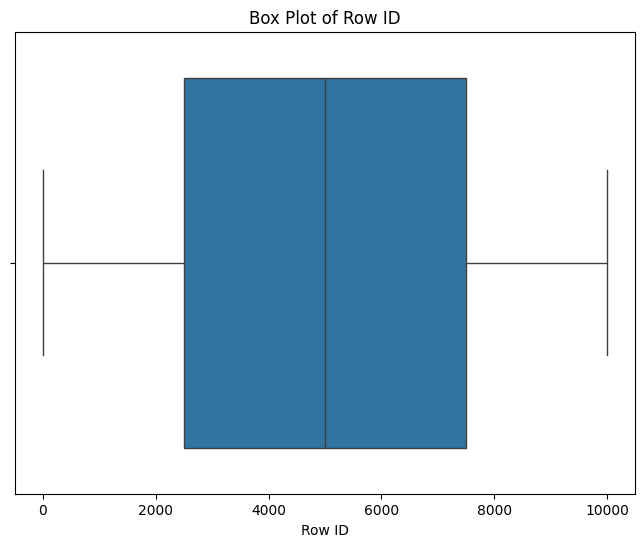

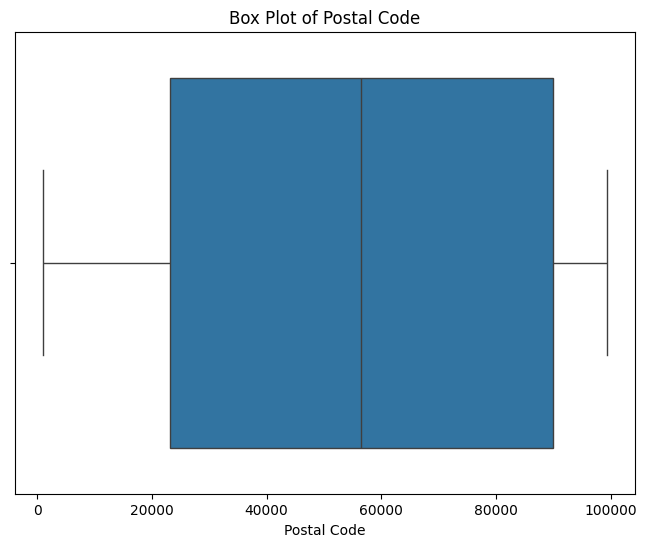

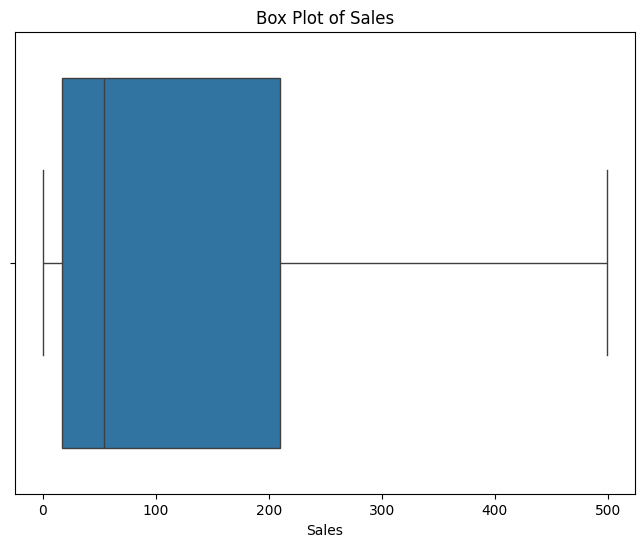

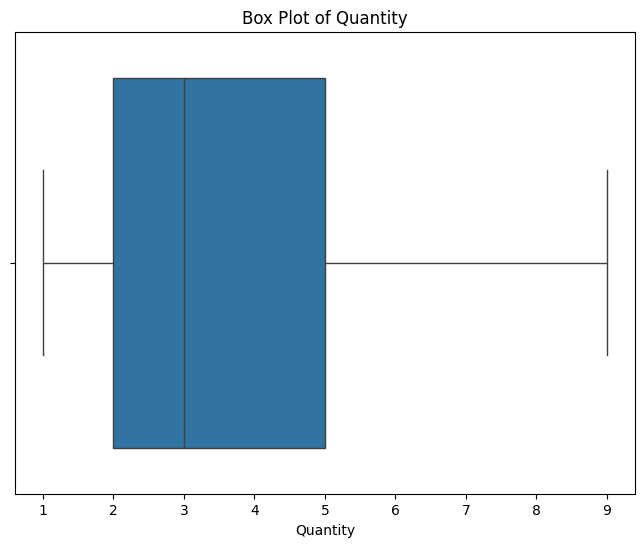

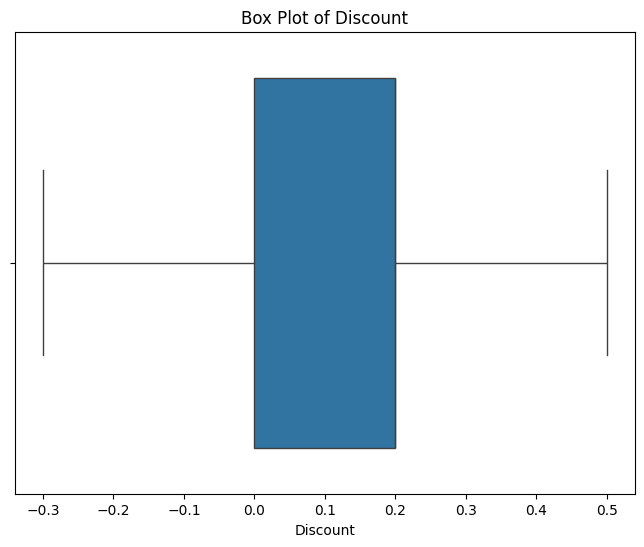

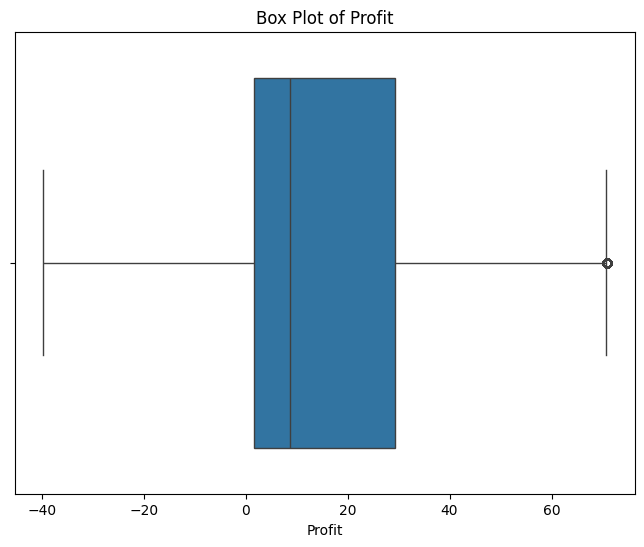

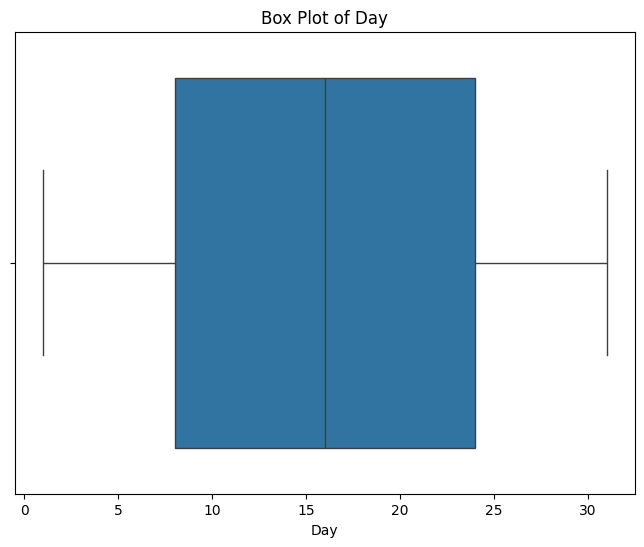

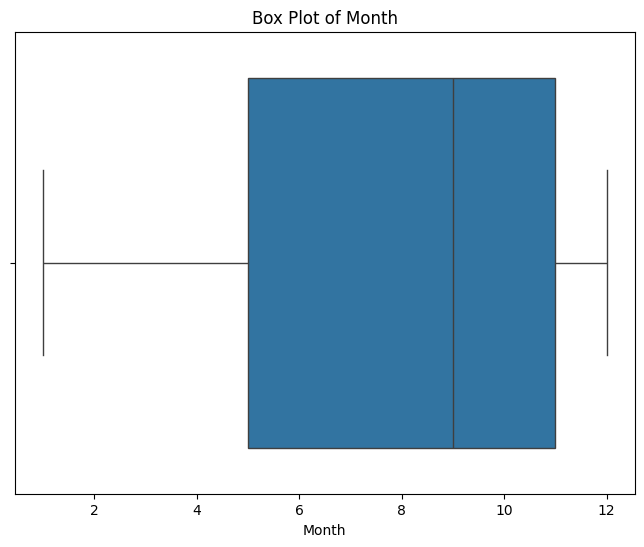

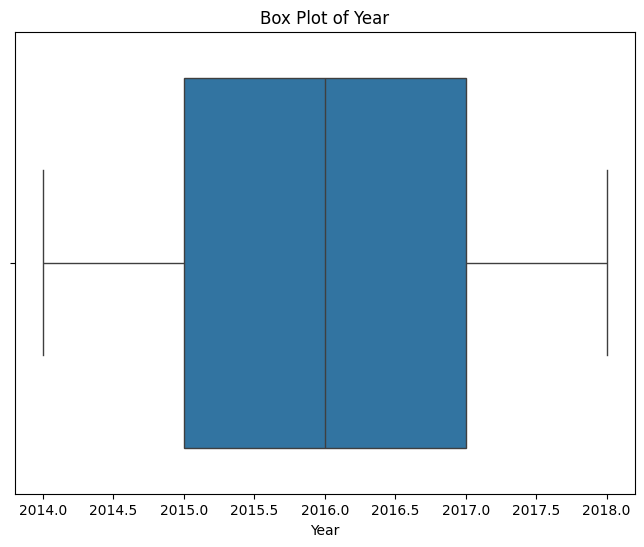

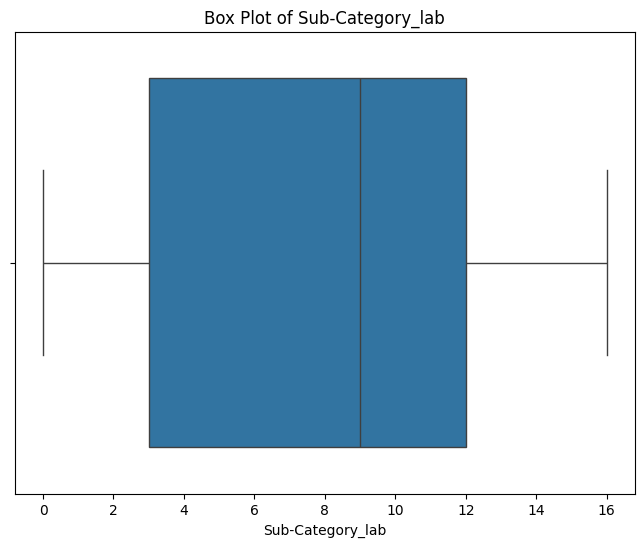

In [106]:
# visualize the box plot for cleaned_data
visualize_box_plot(cleaned_data.output)

In [107]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pycaret.anomaly import *
from AutoClean import AutoClean

In [108]:
# Convert cleaned data to DataFrame
df_cleaned = cleaned_data.output

In [109]:
df_cleaned

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_lab,Region_Central,Region_East,Region_South,Region_West
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,False,True,False,False,4,False,False,True,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,False,True,False,False,5,False,False,True,False
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,True,False,False,True,False,10,False,False,False,True
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,False,True,False,False,16,False,False,True,False
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,False,False,True,False,14,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,False,False,True,False,False,9,False,False,True,False
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,False,False,True,False,False,9,False,False,False,True
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,False,False,False,False,True,13,False,False,False,True
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,False,False,False,True,False,12,False,False,False,True


hereeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee


In [110]:
# Step 2: Check for duplicate column names
# df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.duplicated()]

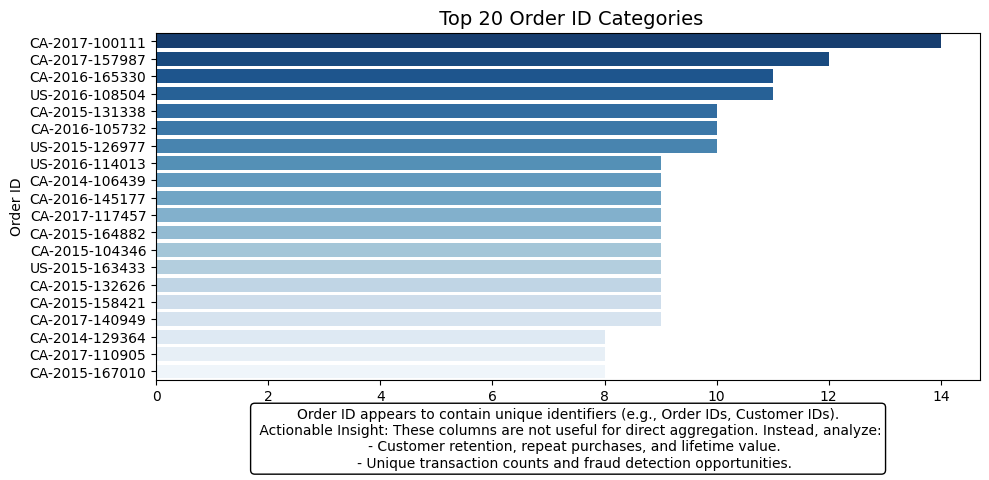

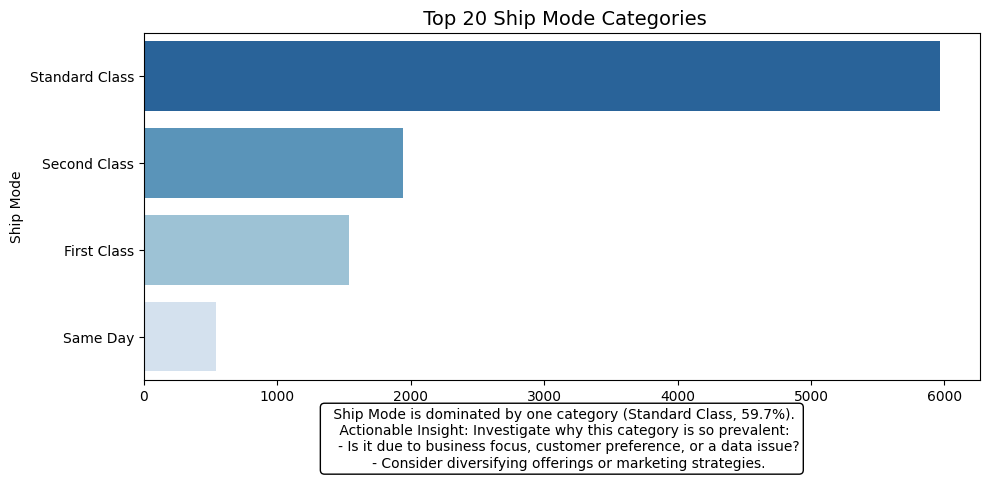

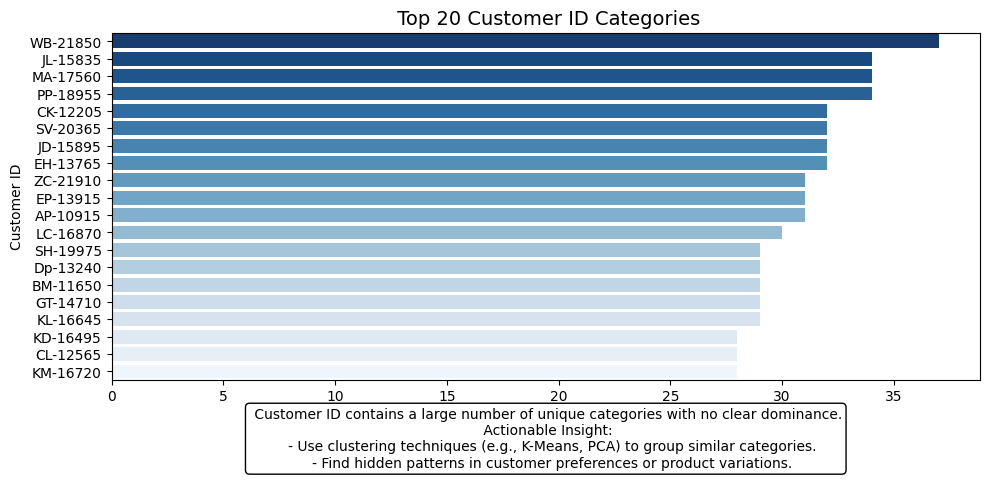

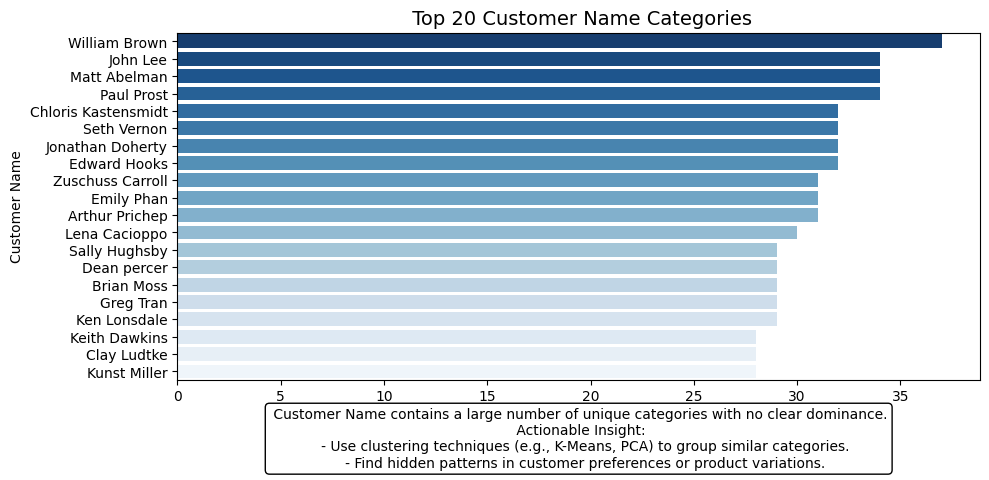

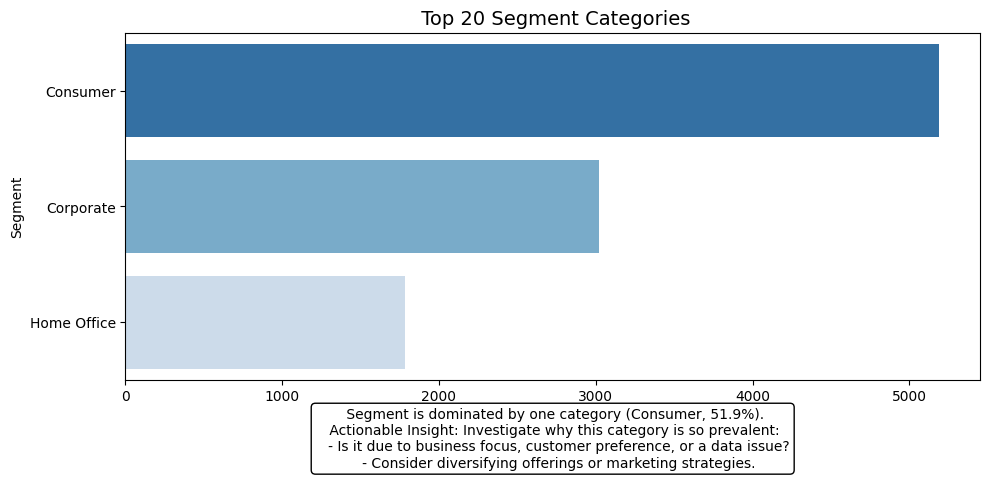

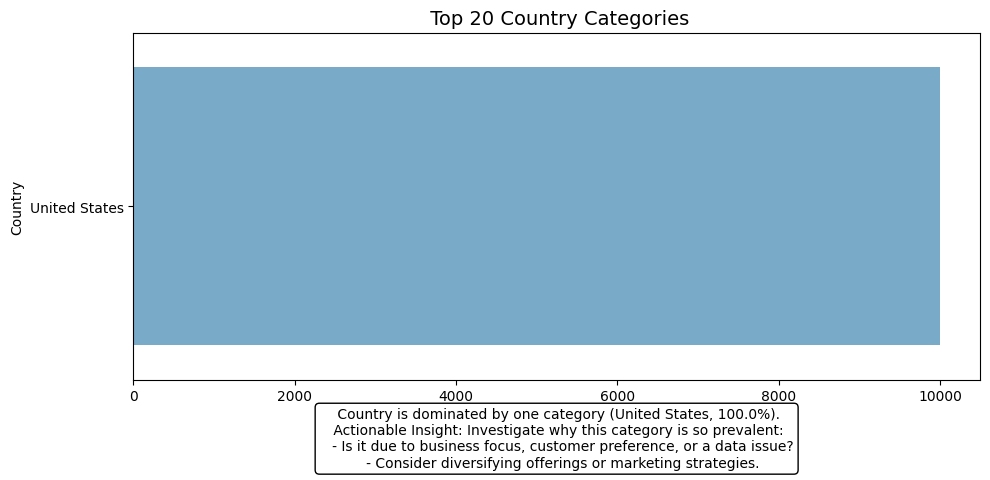

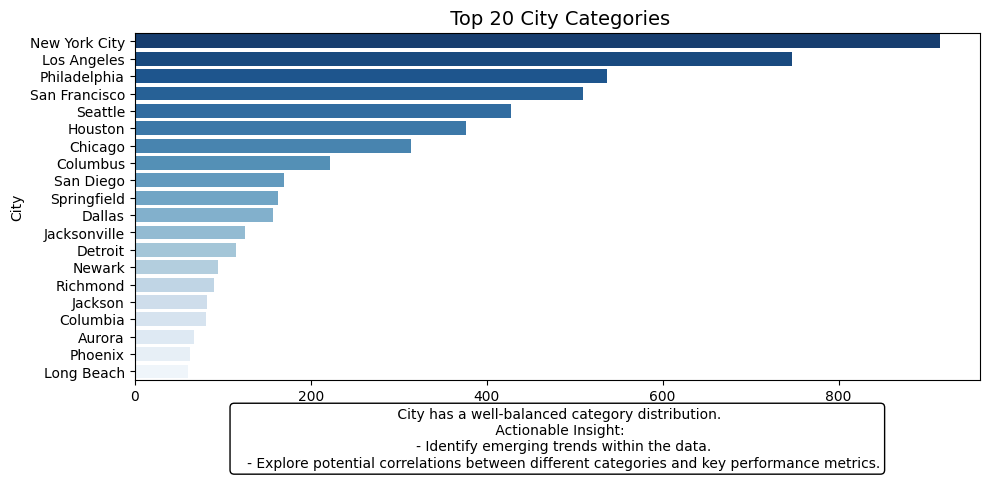

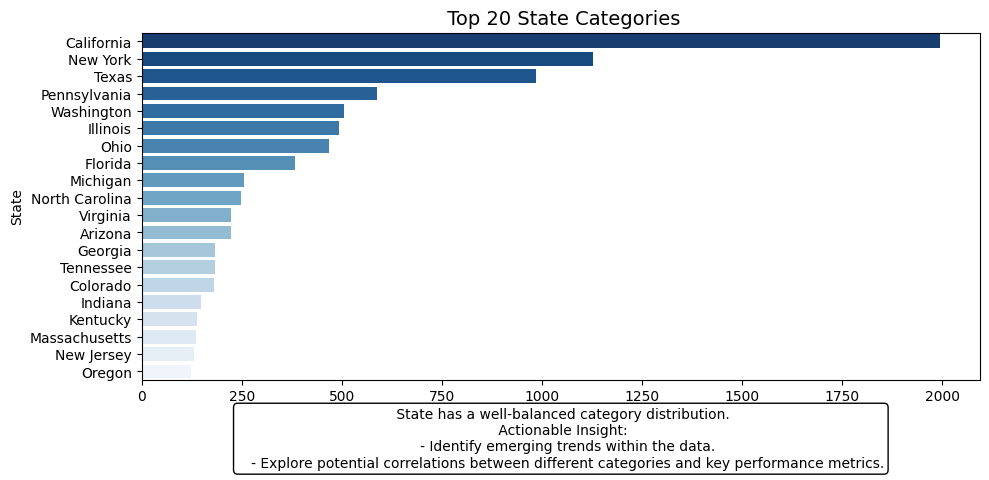

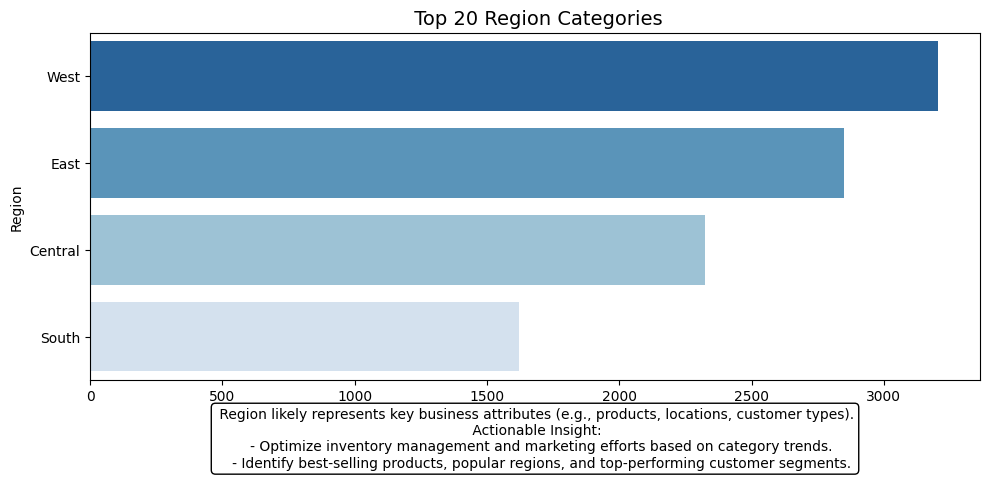

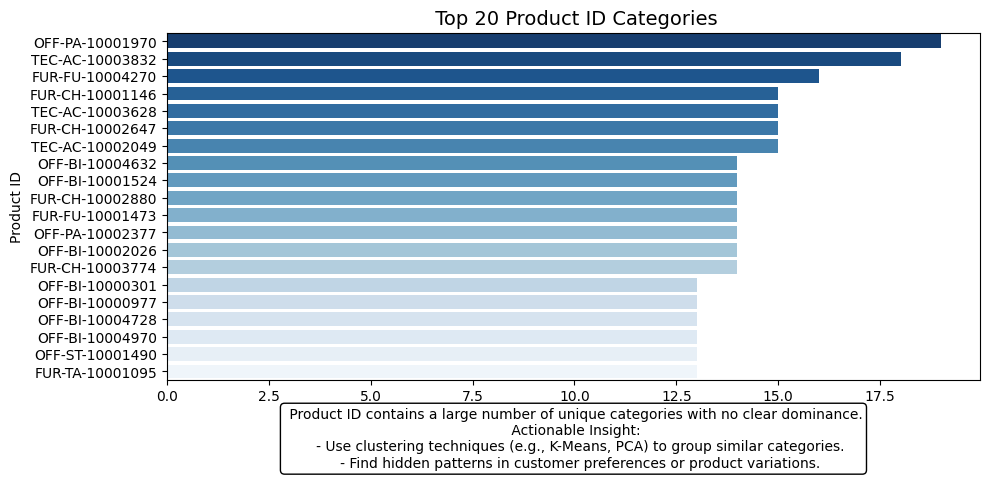

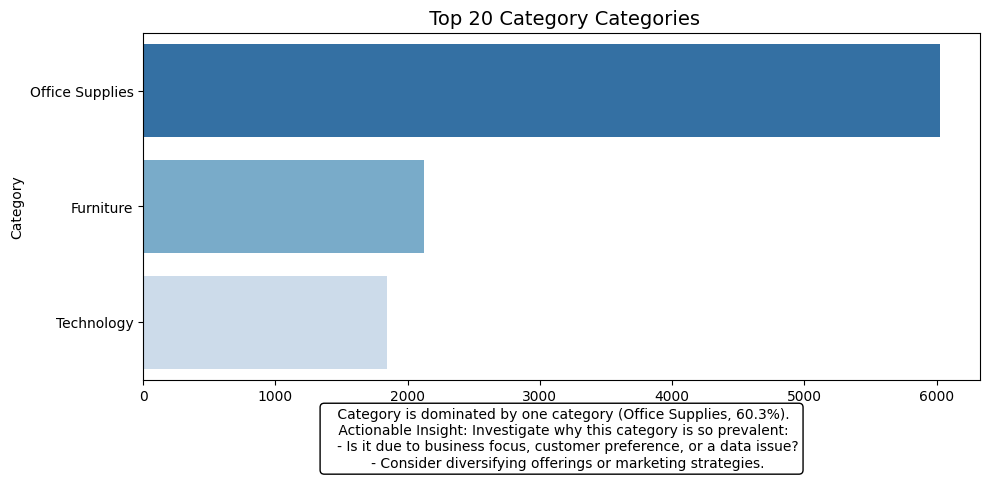

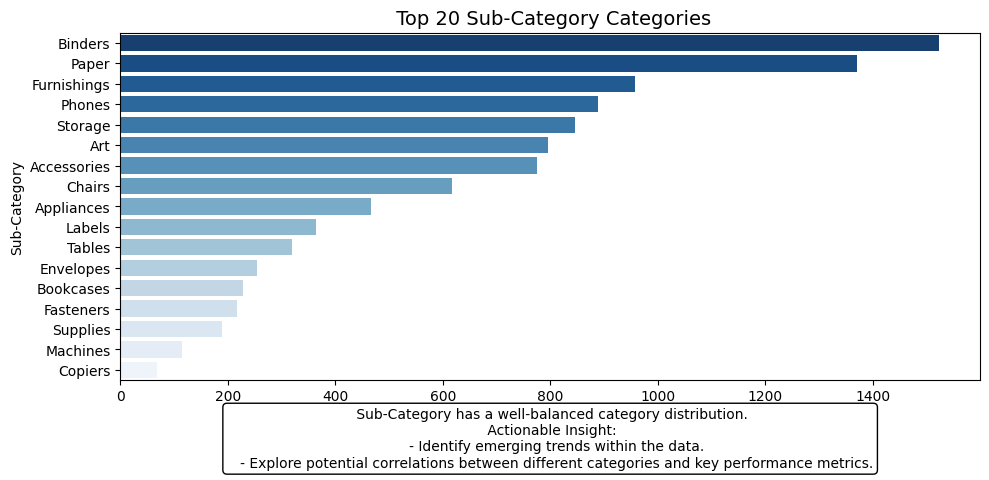

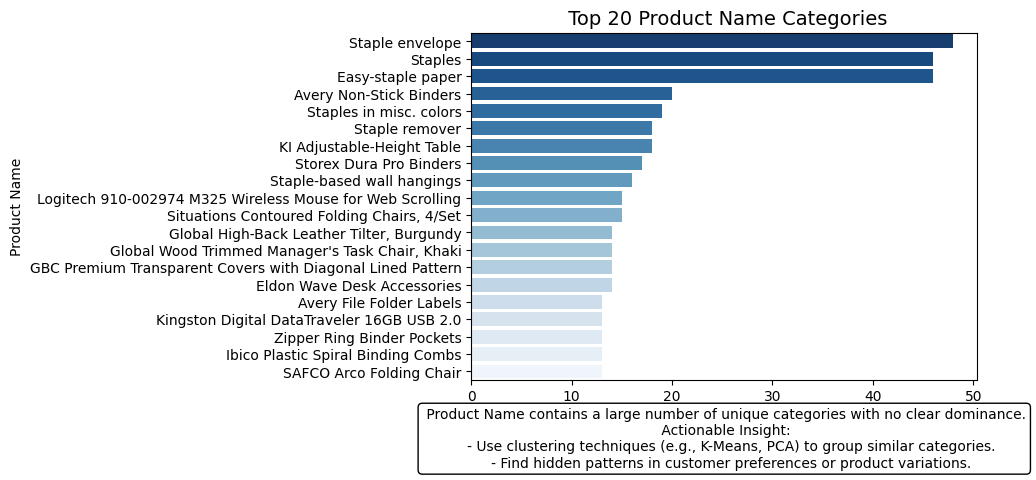

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_dynamic_insights(df, column):
    """
    📌 Generates automated business insights based on unique value distributions and category dominance.
    🔹 It dynamically analyzes categorical data without prior knowledge of the dataset.
    🔹 The function identifies key patterns that may indicate business opportunities or concerns.
    """
    unique_values = df[column].nunique()
    total_values = len(df[column])

    # **1. Unique Identifiers (Customer IDs, Order Numbers, etc.)**
    if unique_values > total_values * 0.5:
        return (f"{column} appears to contain unique identifiers (e.g., Order IDs, Customer IDs).\n"
                " Actionable Insight: These columns are not useful for direct aggregation. Instead, analyze:\n"
                "   - Customer retention, repeat purchases, and lifetime value.\n"
                "   - Unique transaction counts and fraud detection opportunities.")

    # **2. High Concentration of a Single Category**
    top_category_percentage = df[column].value_counts(normalize=True).iloc[0]  # % of most common value
    if top_category_percentage > 0.5:
        top_category = df[column].value_counts().idxmax()
        return (f" {column} is dominated by one category ({top_category}, {top_category_percentage:.1%}).\n"
                " Actionable Insight: Investigate why this category is so prevalent:\n"
                "   - Is it due to business focus, customer preference, or a data issue?\n"
                "   - Consider diversifying offerings or marketing strategies.")

    # **3. Many Categories with No Clear Dominance (Requires Segmentation)**
    elif unique_values > 50 and top_category_percentage < 0.05:
        return (f" {column} contains a large number of unique categories with no clear dominance.\n"
                " Actionable Insight:\n"
                "   - Use clustering techniques (e.g., K-Means, PCA) to group similar categories.\n"
                "   - Find hidden patterns in customer preferences or product variations.")

    # **4. Balanced Category Distribution (Potential Business Trends)**
    elif unique_values > 5 and top_category_percentage < 0.3:
        return (f" {column} has a well-balanced category distribution.\n"
                " Actionable Insight:\n"
                "   - Identify emerging trends within the data.\n"
                "   - Explore potential correlations between different categories and key performance metrics.")

    # **5. Rarely Used Categories (Niche Products or Anomalies)**
    rare_categories = (df[column].value_counts(normalize=True) < 0.01).sum()
    if rare_categories > unique_values * 0.5:
        return (f" {column} contains many low-frequency categories (potential outliers or niche segments).\n"
                " Actionable Insight:\n"
                "   - Investigate if these rare categories represent special cases, premium products, or errors.\n"
                "   - Consider whether to merge, remove, or highlight these categories in reporting.")

    # **6. Common Business Attributes (Products, Locations, or Customer Segments)**
    elif unique_values < total_values * 0.05:
        return (f" {column} likely represents key business attributes (e.g., products, locations, customer types).\n"
                " Actionable Insight:\n"
                "   - Optimize inventory management and marketing efforts based on category trends.\n"
                "   - Identify best-selling products, popular regions, and top-performing customer segments.")

    # **7. Default Insight for Unclassified Columns**
    return (f" {column} contains valuable categorical data that could provide business insights.\n"
            " Actionable Insight:\n"
            "   - Analyze distribution trends to understand seasonality, regional preferences, or behavioral shifts.\n"
            "   - Look for correlations with key business metrics like revenue, sales, or retention rates.")

def plot_top_categorical_counts_with_dynamic_insights(df):
    """
    📌 This function:
    🔹 Plots the top 20 most frequent categories for each categorical column.
    🔹 Displays dynamic, automated business insights based on data patterns.
    🔹 Helps businesses understand their categorical distributions at a glance.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns

    for column in categorical_columns:
        top_20 = df[column].value_counts().nlargest(20)

        plt.figure(figsize=(10, 5))
        ax = sns.barplot(y=top_20.index, x=top_20.values, palette="Blues_r")
        plt.xlabel("Count")
        plt.ylabel(column)
        plt.title(f" Top 20 {column} Categories", fontsize=14)

        # Generate automated insight
        insight_text = generate_dynamic_insights(df, column)
        plt.text(0.5, -0.25, insight_text, fontsize=10, ha="center", transform=plt.gca().transAxes,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        plt.tight_layout()
        plt.show()


# 🏆 **Example Usage**
# print("\n📊 **Showing Top 20 Categorical Features with Automated Business Insights:**")
plot_top_categorical_counts_with_dynamic_insights(df_cleaned)


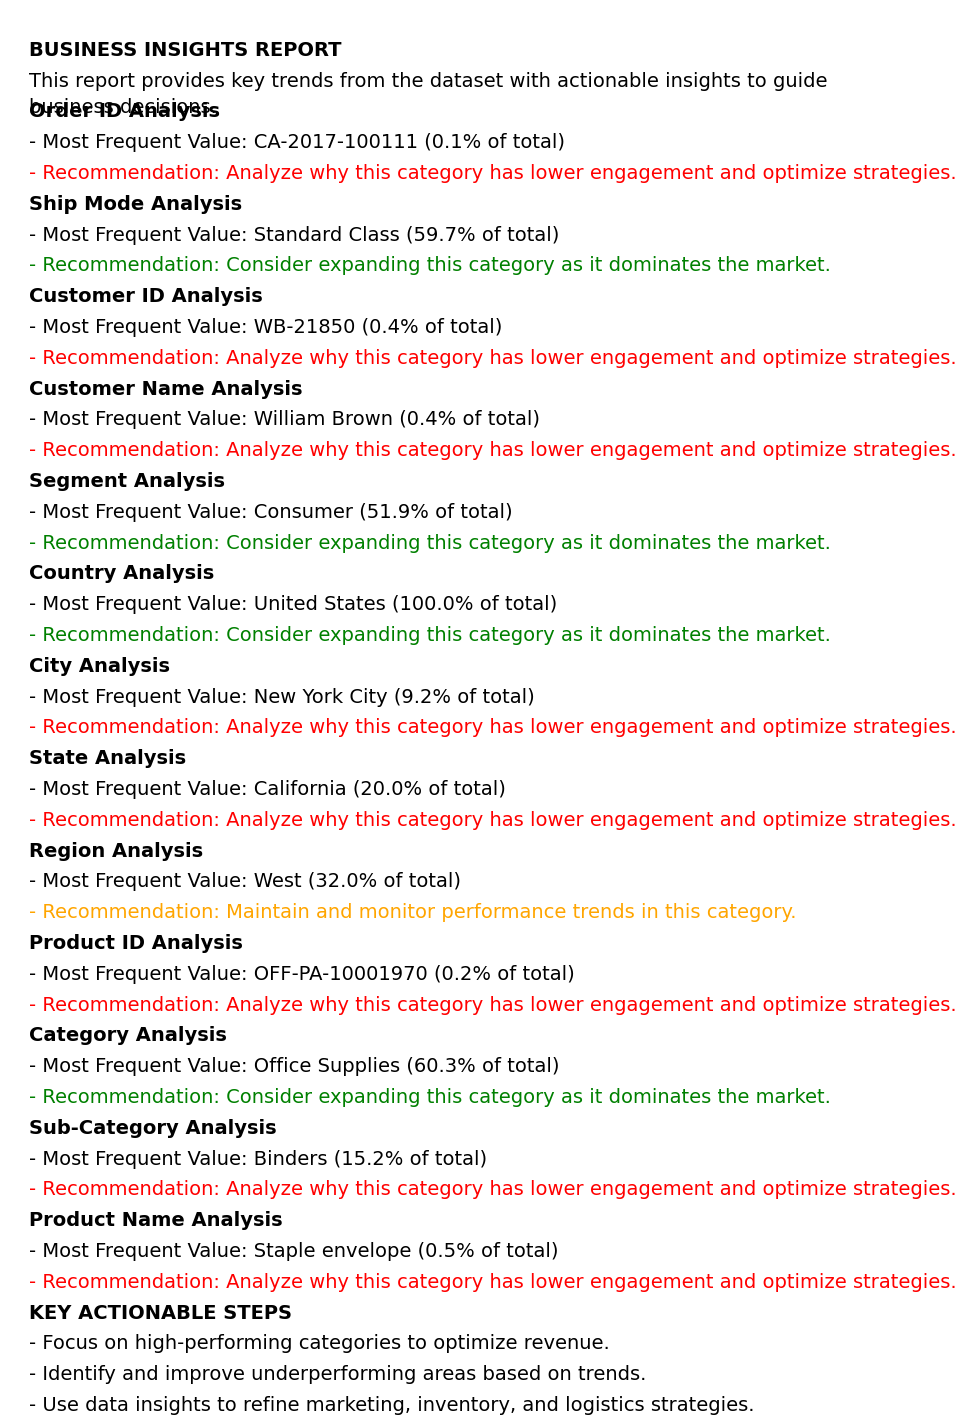

In [112]:
import matplotlib.pyplot as plt
from textwrap import wrap

def generate_summary_report_image(df):
    """
    Generates and displays a structured business insights report with improved readability.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns
    insights = []

    # Title Section
    insights.append(("BUSINESS INSIGHTS REPORT\n", "black", "bold"))
    insights.append(("This report provides key trends from the dataset with actionable insights to guide business decisions.\n\n", "black", "regular"))

    # Generate insights for each categorical column
    for column in categorical_columns:
        top_value = df[column].value_counts().idxmax()  # Most frequent category
        count = df[column].value_counts().max()
        total = len(df)
        percentage = (count / total) * 100

        # Define color coding
        if percentage > 50:
            color = "green"  # Green for strong-performing areas
            action = "Recommendation: Consider expanding this category as it dominates the market."
        elif percentage > 20:
            color = "orange"  # Orange for balanced areas
            action = "Recommendation: Maintain and monitor performance trends in this category."
        else:
            color = "red"  # Red for underperforming areas
            action = "Recommendation: Analyze why this category has lower engagement and optimize strategies."

        # Generate formatted insight
        insights.append((f"{column} Analysis", "black", "bold"))  # Bold column name
        insights.append((f"- Most Frequent Value: {top_value} ({percentage:.1f}% of total)", "black", "regular"))
        insights.append((f"- {action}\n", color, "regular"))

    # Key Actionable Steps
    insights.append(("KEY ACTIONABLE STEPS\n", "black", "bold"))
    insights.append(("- Focus on high-performing categories to optimize revenue.", "black", "regular"))
    insights.append(("- Identify and improve underperforming areas based on trends.", "black", "regular"))
    insights.append(("- Use data insights to refine marketing, inventory, and logistics strategies.", "black", "regular"))

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # Display text inside the figure with different colors and font weights
    y_position = 0.95
    for text, color, weight in insights:
        wrapped_text = "\n".join(wrap(text, width=90))
        ax.text(
            0.02, y_position, wrapped_text,
            fontsize=14,
            va="top", ha="left",
            family="Times New Roman",
            fontweight=weight,  # Use bold or regular
            linespacing=1.5,
            color=color
        )
        y_position -= 0.05  # Adjust spacing

    # Show the report image
    plt.show()

# Run the improved report
generate_summary_report_image(df_cleaned)


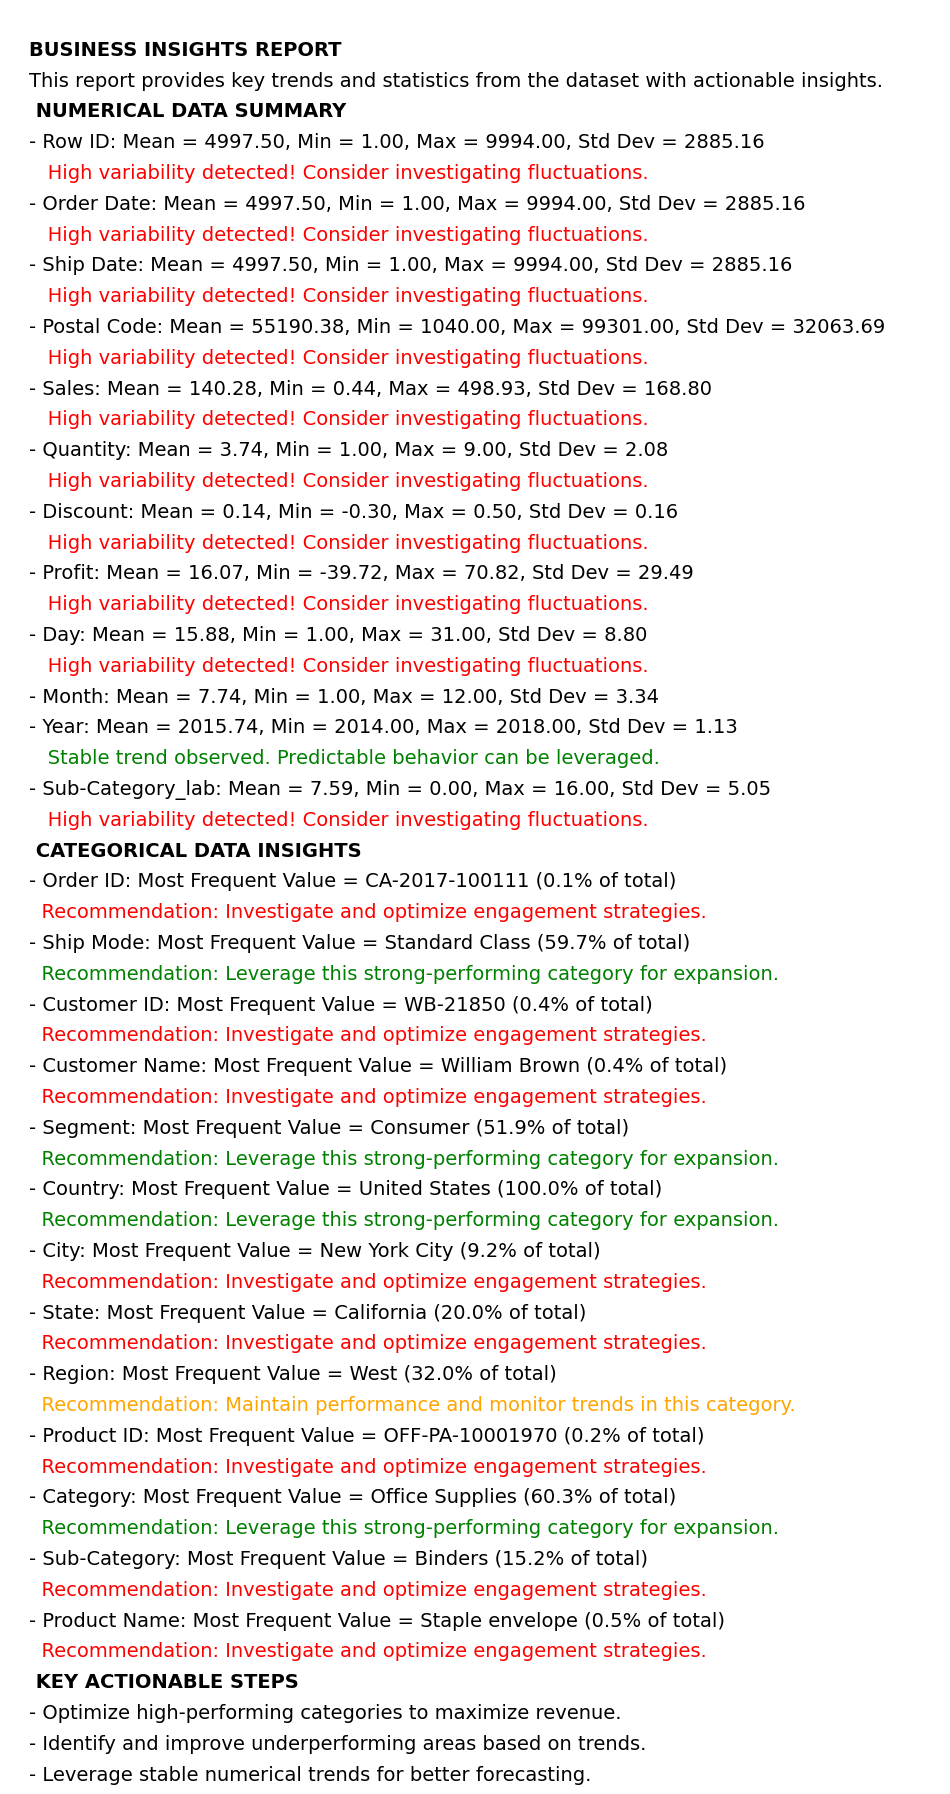

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
from textwrap import wrap

def generate_summary_report_image(df):
    """
    Generates a structured business insights report including statistical summaries (from df.describe())
    and actionable insights for categorical columns.
    """
    insights = []
    numerical_summary = df.describe().transpose()
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Title Section
    insights.append(("BUSINESS INSIGHTS REPORT\n", "black", "bold"))
    insights.append(("This report provides key trends and statistics from the dataset with actionable insights.", "black", "regular"))

    # Add Numerical Summary
    insights.append(("\nNUMERICAL DATA SUMMARY\n", "black", "bold"))
    for column in numerical_summary.index:
        # Check if the column type is numeric before calculating statistics
        if pd.api.types.is_numeric_dtype(df[column]):
            mean_value = numerical_summary.loc[column, 'mean']
            min_value = numerical_summary.loc[column, 'min']
            max_value = numerical_summary.loc[column, 'max']
            std_dev = numerical_summary.loc[column, 'std']

        insights.append((f"- {column}: Mean = {mean_value:.2f}, Min = {min_value:.2f}, Max = {max_value:.2f}, Std Dev = {std_dev:.2f}", "black", "regular"))

        if std_dev > mean_value * 0.5:
            insights.append(("   High variability detected! Consider investigating fluctuations.", "red", "regular"))
        elif std_dev < mean_value * 0.1:
            insights.append(("   Stable trend observed. Predictable behavior can be leveraged.", "green", "regular"))

    # Add Categorical Insights
    insights.append(("\nCATEGORICAL DATA INSIGHTS\n", "black", "bold"))
    for column in categorical_columns:
        top_value = df[column].value_counts().idxmax()
        count = df[column].value_counts().max()
        total = len(df)
        percentage = (count / total) * 100

        # Define color coding
        if percentage > 50:
            color = "green"  # High-performing
            action = "Recommendation: Leverage this strong-performing category for expansion."
        elif percentage > 20:
            color = "orange"  # Balanced
            action = "Recommendation: Maintain performance and monitor trends in this category."
        else:
            color = "red"  # Underperforming
            action = "Recommendation: Investigate and optimize engagement strategies."

        insights.append((f"- {column}: Most Frequent Value = {top_value} ({percentage:.1f}% of total)", "black", "regular"))
        insights.append((f"  {action}\n", color, "regular"))

    # Key Actionable Steps
    insights.append(("\nKEY ACTIONABLE STEPS\n", "black", "bold"))
    insights.append(("- Optimize high-performing categories to maximize revenue.", "black", "regular"))
    insights.append(("- Identify and improve underperforming areas based on trends.", "black", "regular"))
    insights.append(("- Leverage stable numerical trends for better forecasting.", "black", "regular"))

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # Display text inside the figure with different colors and font weights
    y_position = 0.95
    for text, color, weight in insights:
        wrapped_text = "\n".join(wrap(text, width=90))
        ax.text(
            0.02, y_position, wrapped_text,
            fontsize=14,
            va="top", ha="left",
            family="Times New Roman",
            fontweight=weight,
            linespacing=1.5,
            color=color
        )
        y_position -= 0.05  # Adjust spacing

    # Show the report image
    plt.show()

generate_summary_report_image(df_cleaned)


In [115]:
df_cleaned

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_lab,Region_Central,Region_East,Region_South,Region_West
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,False,True,False,False,4,False,False,True,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,False,True,False,False,5,False,False,True,False
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,True,False,False,True,False,10,False,False,False,True
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,False,True,False,False,16,False,False,True,False
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,False,False,True,False,14,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,False,False,True,False,False,9,False,False,True,False
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,False,False,True,False,False,9,False,False,False,True
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,False,False,False,False,True,13,False,False,False,True
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,False,False,False,True,False,12,False,False,False,True


# **deep seek**

In [120]:
df_cleaned

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category_Technology,Sub-Category_lab,Region_Central,Region_East,Region_South,Region_West,cluster,pca1,pca2,anomaly
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,4,False,False,True,False,2,2.108513,-0.709118,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,False,5,False,False,True,False,2,3.603634,0.331758,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,False,10,False,False,False,True,1,-0.276011,-1.591306,1
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,16,False,False,True,False,0,-2.121896,5.075302,-1
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,False,14,False,False,True,False,1,-0.824801,-0.983613,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,False,9,False,False,True,False,1,-0.935775,-0.719854,1
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,False,9,False,False,False,True,1,0.062827,-1.436088,1
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,True,13,False,False,False,True,1,-0.019956,-0.229963,1
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,False,12,False,False,False,True,1,0.132975,-1.141653,1



=== Distribution of Numerical Columns ===


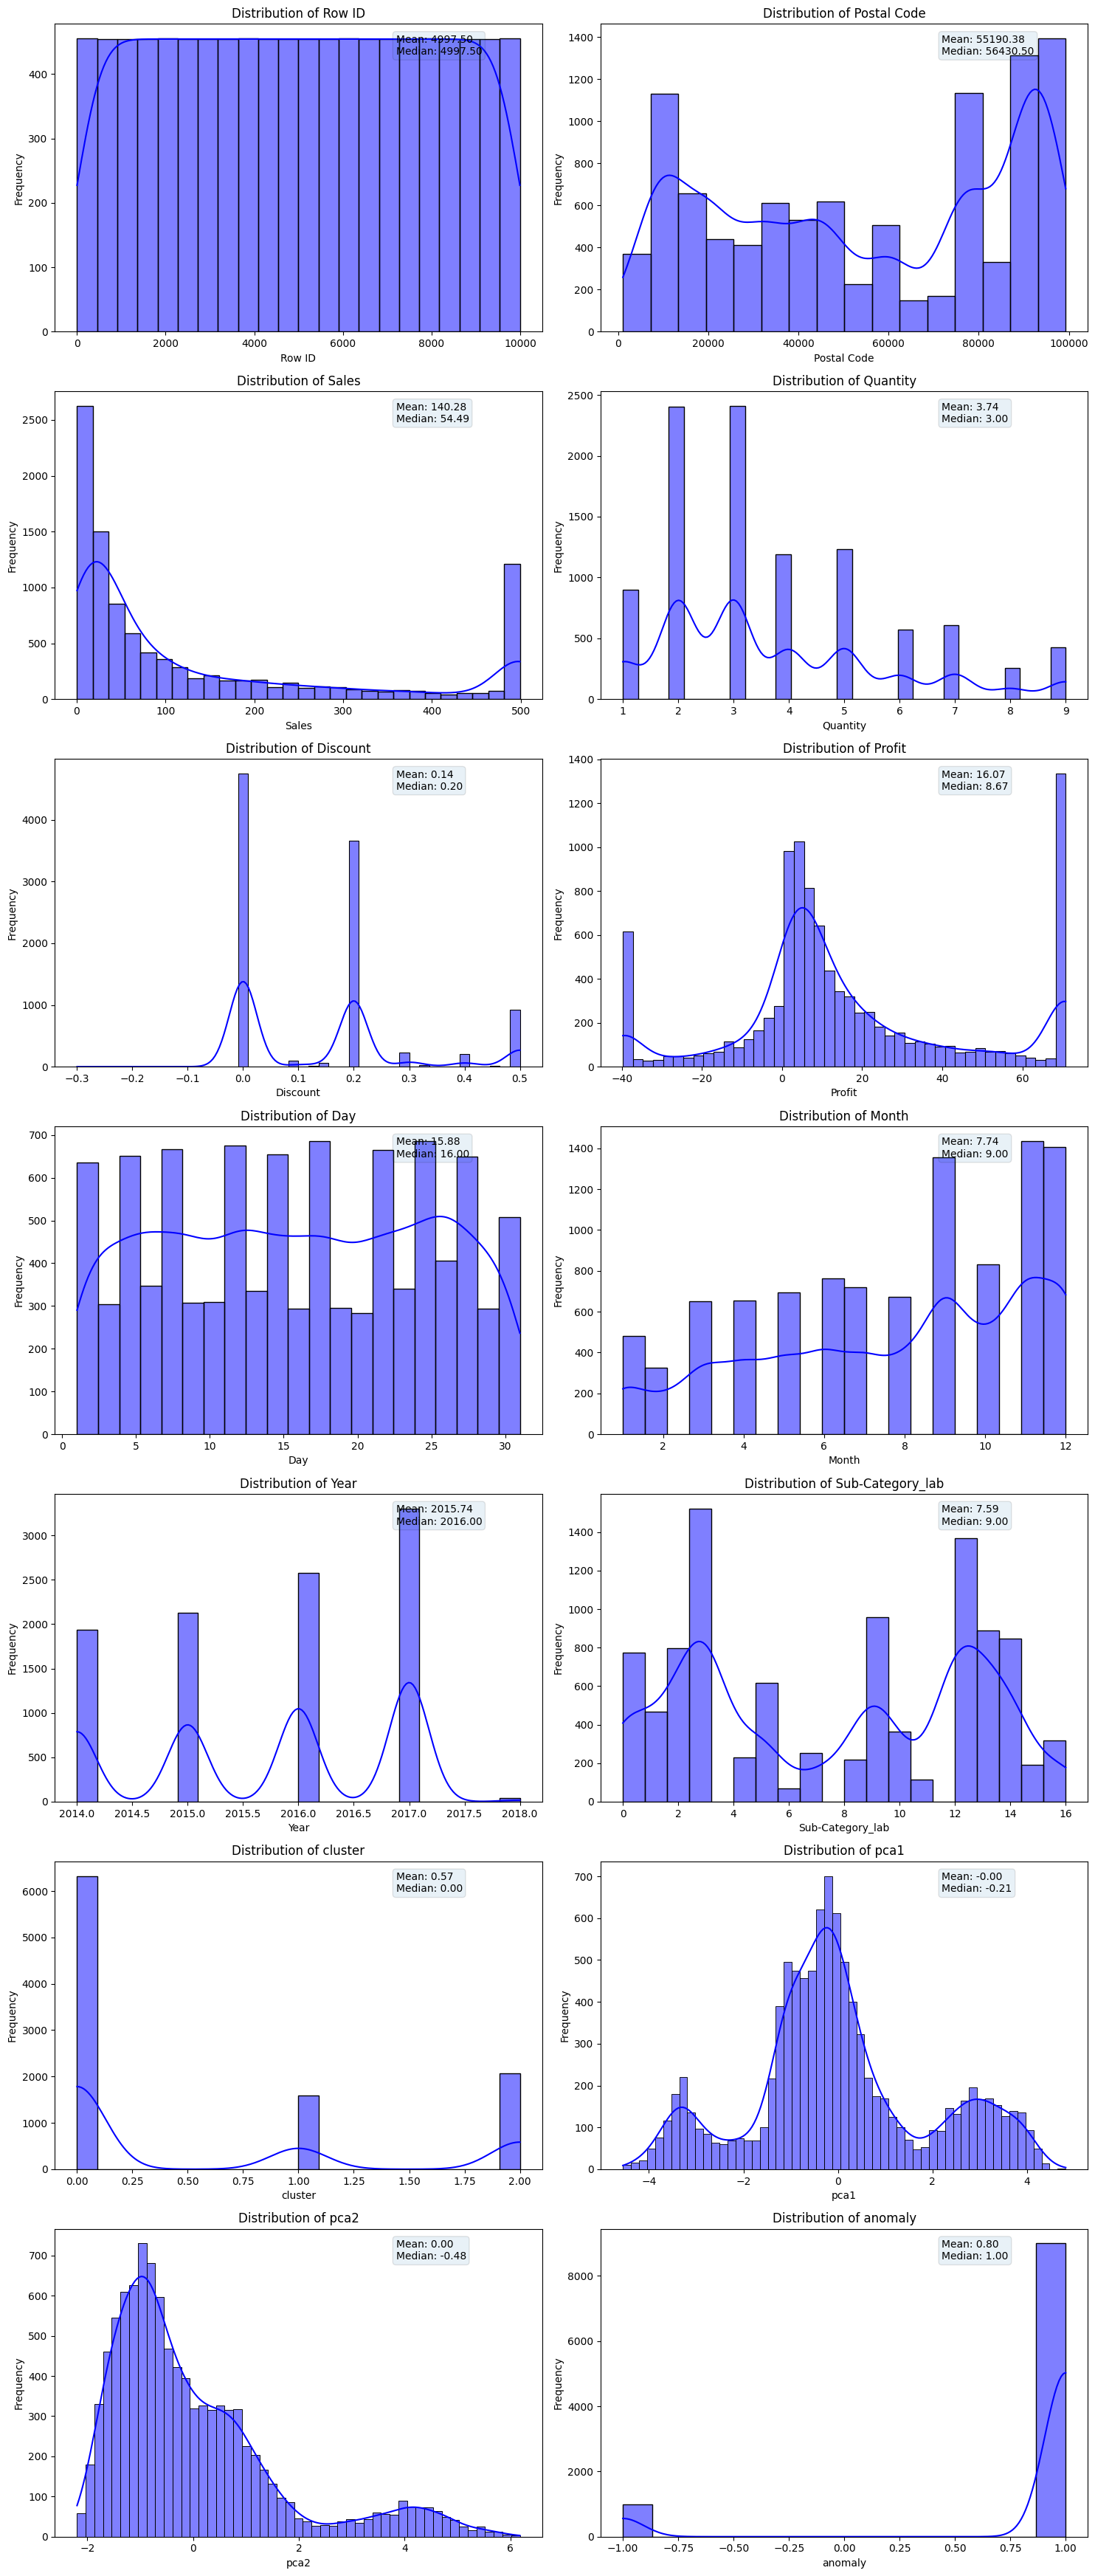

Recommendation: Look for patterns in the data distribution. If the data is skewed, consider normalizing it for better analysis.

=== Correlation Between Numerical Features ===


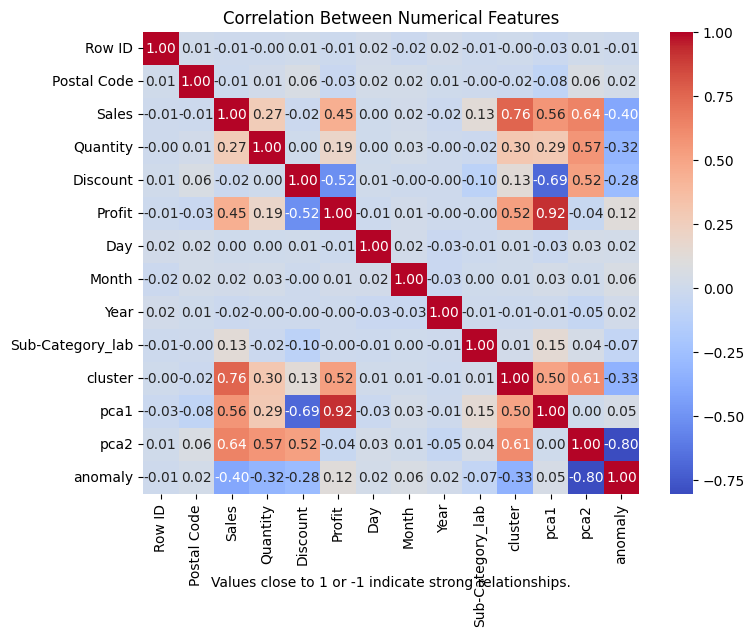

Recommendation: Focus on highly correlated features (close to 1 or -1) for deeper analysis. For example, if income and spending are highly correlated, target high-income customers for premium products.

=== Customer Segmentation ===


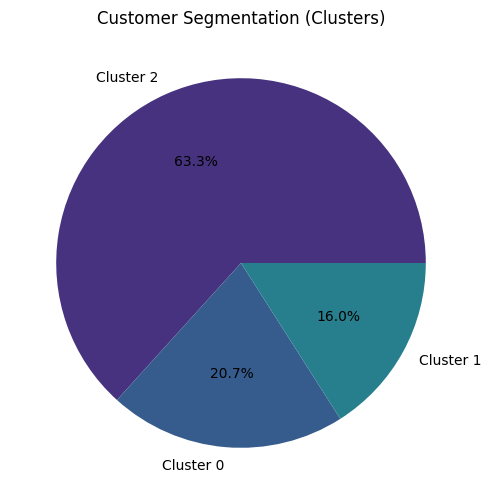

Recommendation: Use clusters to group customers with similar behaviors. For example, Cluster 0 might represent budget-conscious customers, while Cluster 1 represents high-spending customers. Tailor marketing strategies for each group.

=== Trends Over Time ===


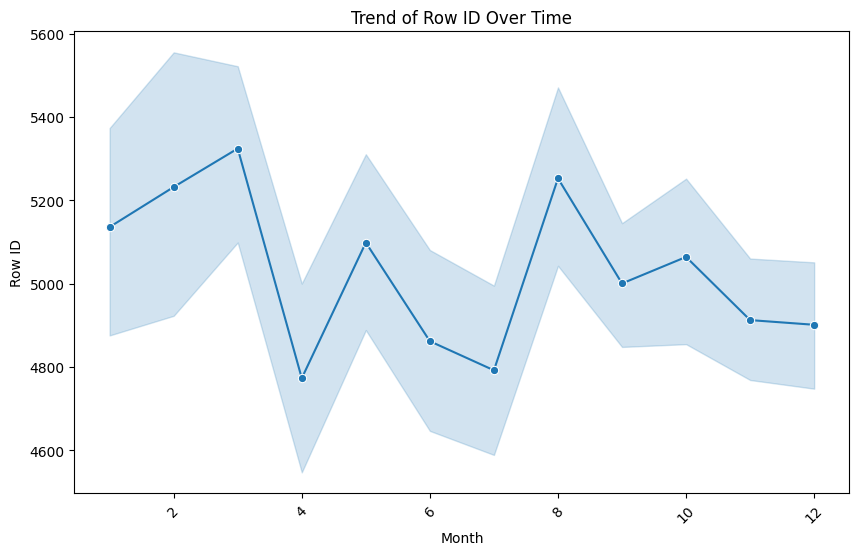

Recommendation: Analyze trends over time to identify growth or decline. For example, if Row ID is increasing, consider scaling up resources to meet demand.

=== Business Insights ===

Correlation between Row ID and Postal Code: 0.01
- Weak or no correlation: The two variables are not strongly related.
Recommendation: Use correlations to identify key drivers of business outcomes. For example, if income and spending are strongly correlated, focus on increasing customer income through loyalty programs.


In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from textwrap import wrap

# Function for business-friendly EDA
def business_friendly_eda(df):
    # 1. Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # 2. Distribution of Numerical Columns (Histograms)
    print("\n=== Distribution of Numerical Columns ===")
    num_rows = int(np.ceil(len(numerical_cols) / 2))  # Calculate rows for subplots
    num_cols = min(len(numerical_cols), 2)  # Maximum 2 columns
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure height based on rows
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(df[col], kde=True, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.annotate(f"Mean: {df[col].mean():.2f}\nMedian: {df[col].median():.2f}",
                     xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", alpha=0.1))
    plt.tight_layout()
    plt.show()
    print("Recommendation: Look for patterns in the data distribution. If the data is skewed, consider normalizing it for better analysis.")

    # 3. Correlation Heatmap
    if len(numerical_cols) > 1:
        print("\n=== Correlation Between Numerical Features ===")
        plt.figure(figsize=(8, 6))
        sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Between Numerical Features')
        plt.annotate("Values close to 1 or -1 indicate strong relationships.",
                     xy=(0.5, -0.2), xycoords='axes fraction', fontsize=10, ha='center')
        plt.show()
        print("Recommendation: Focus on highly correlated features (close to 1 or -1) for deeper analysis. For example, if income and spending are highly correlated, target high-income customers for premium products.")

    # 4. Pie Chart for Clusters (Customer Segmentation)
    if len(numerical_cols) > 1:
        print("\n=== Customer Segmentation ===")
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df[numerical_cols])
        kmeans = KMeans(n_clusters=3)
        df['cluster'] = kmeans.fit_predict(scaled_data)
        cluster_counts = df['cluster'].value_counts()
        plt.figure(figsize=(8, 6))
        plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index], autopct='%1.1f%%', colors=sns.color_palette('viridis'))
        plt.title('Customer Segmentation (Clusters)')
        plt.show()
        print("Recommendation: Use clusters to group customers with similar behaviors. For example, Cluster 0 might represent budget-conscious customers, while Cluster 1 represents high-spending customers. Tailor marketing strategies for each group.")

    # 5. Line Chart for Trends Over Time (if applicable)
    if 'Date' in df.columns or 'Month' in df.columns:
        print("\n=== Trends Over Time ===")
        time_col = 'Date' if 'Date' in df.columns else 'Month'
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=df[time_col], y=df[numerical_cols[0]], marker='o')
        plt.title(f'Trend of {numerical_cols[0]} Over Time')
        plt.xlabel(time_col)
        plt.ylabel(numerical_cols[0])
        plt.xticks(rotation=45)
        plt.show()
        print(f"Recommendation: Analyze trends over time to identify growth or decline. For example, if {numerical_cols[0]} is increasing, consider scaling up resources to meet demand.")





    # 8. Business Insights
    print("\n=== Business Insights ===")
    if len(numerical_cols) >= 2:
        correlation = df[numerical_cols[0]].corr(df[numerical_cols[1]])
        print(f"\nCorrelation between {numerical_cols[0]} and {numerical_cols[1]}: {correlation:.2f}")
        if correlation > 0.5:
            print("- Strong positive correlation: As one increases, the other tends to increase.")
        elif correlation < -0.5:
            print("- Strong negative correlation: As one increases, the other tends to decrease.")
        else:
            print("- Weak or no correlation: The two variables are not strongly related.")
        print("Recommendation: Use correlations to identify key drivers of business outcomes. For example, if income and spending are strongly correlated, focus on increasing customer income through loyalty programs.")

# Perform Business-Friendly EDA
business_friendly_eda(df_cleaned)